In [256]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()
plt.rcParams.update({'font.size': 22})

###Params

In [257]:
x = sp.Function("x")
x0 = sp.Symbol("x_0", real = True)
v0 = sp.Symbol("v_0", real = True)
ww = sp.Symbol("omega", real = True, positive = True)
w = sp.Symbol("omega_0", real = True, positive = True)
A = sp.Symbol("A", real = True)
t = sp.Symbol("t")
beta = sp.Symbol("beta", real = True)
x(t),ww,w,beta, A, t, x0, v0

###Simple harmonic oscillator

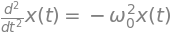

In [258]:
eq = sp.Eq(x(t).diff(t,2), -w**2*x(t))
eq

In [259]:
results = sp.dsolve(eq,x(t), ics = {x(0) : x0, x(t).diff(t).subs(t,0) : v0})
results

In [260]:
end = sp.lambdify(t,results.rhs.subs({x0 : 1, v0 : -1, w : 2}))

Text(0.5, 1.0, 'Simple harmonic oscillator')

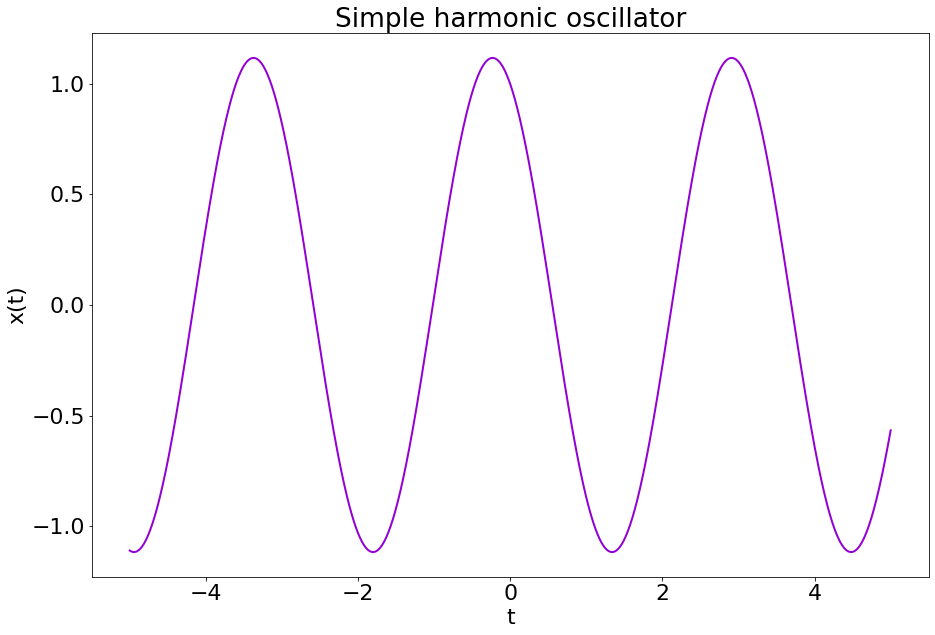

In [261]:
xx = np.linspace(-5,5,1000)
plt.figure(figsize=(15,10))
plt.plot(xx,end(xx), color = "darkviolet", linewidth = 2)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Simple harmonic oscillator")

###Damped harmonic oscillator

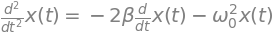

In [262]:
eq2 = sp.Eq(x(t).diff(t,2), -2*beta*x(t).diff(t) -w**2*x(t))
eq2

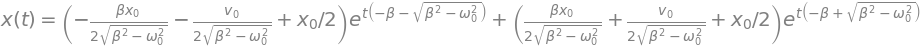

In [263]:
results2 = sp.dsolve(eq2,x(t), ics = {x(0) : x0, x(t).diff(t).subs(t,0) : v0})
results2

Text(0.5, 1.0, 'Damped harmonic oscillator ($\\beta = 1$)')

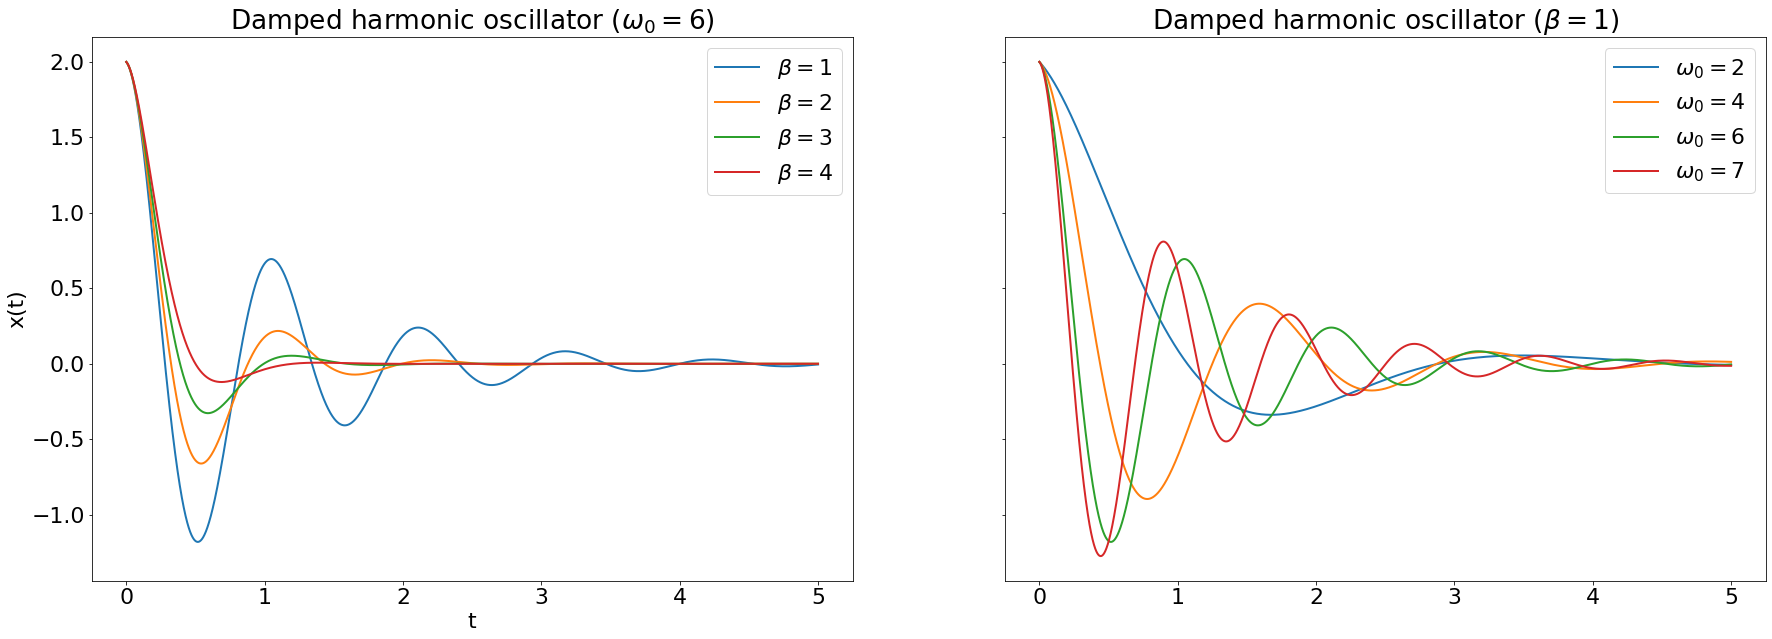

In [264]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10),sharex = True, sharey = True)
xx = np.linspace(0,5,10000)
for i,j in zip([1,2,3,4,7,8],[2,4,6,7]):
  ende = sp.lambdify(t,results2.rhs.subs({x0 : 2, v0 : -1, beta : i , w : 6}))
  ende2 = sp.lambdify(t,results2.rhs.subs({x0 : 2, v0 : -1, beta : 1 , w : j}))
  ax1.plot(xx,ende(xx).real, linewidth = 2, label = r"$\beta = {}$".format(i))
  ax2.plot(xx,ende2(xx).real, linewidth = 2, label = r"$\omega_0 = {}$".format(j))
plt.tick_params(which='both')
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax1.legend()
ax2.legend()
ax1.set_title(r"Damped harmonic oscillator ($\omega_0 = {}$)".format(6))
ax2.set_title(r"Damped harmonic oscillator ($\beta = {}$)".format(1))

###Driven harmonic oscillator

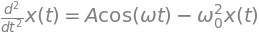

In [265]:
eq22 = sp.Eq(x(t).diff(t,2), -w**2*x(t) + A*sp.cos(ww*t))
eq22

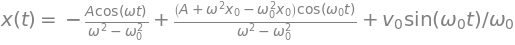

In [266]:
results22 = sp.dsolve(eq22,x(t), ics = {x(0) : x0, x(t).diff(t).subs(t,0) : v0})
results22

Text(0.5, 1.0, 'Driven harmonic oscillator ($\\beta = 1$)')

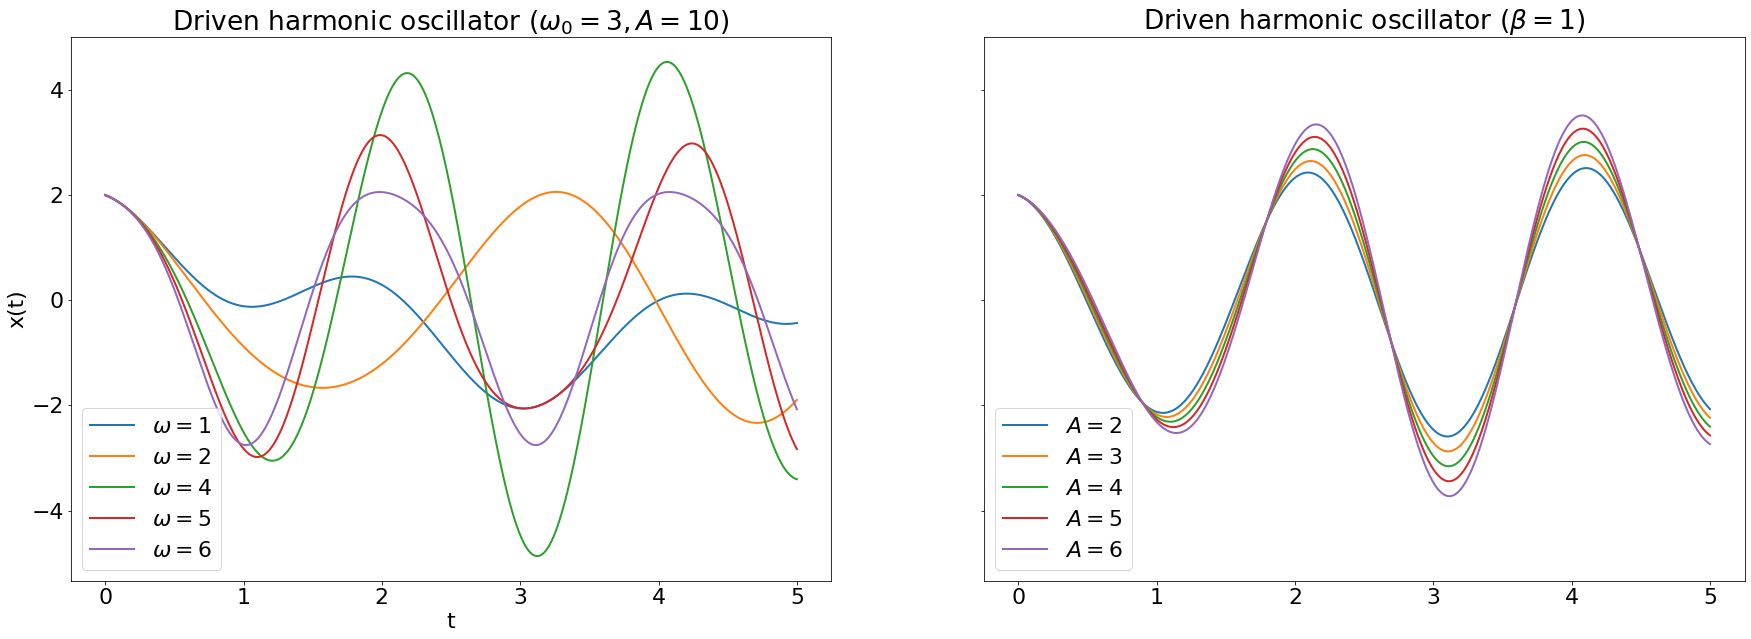

In [267]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10),sharex = True, sharey = True)
xx = np.linspace(0,5,10000)
for i,j in zip([1,2,4,5,6],[2,3,4,5,6]):
  ende = sp.lambdify(t,results22.rhs.subs({x0 : 2, v0 : -1, w : 3, A : 10, ww : i}))
  ende2 = sp.lambdify(t,results22.rhs.subs({x0 : 2, v0 : -1, w : 3, A : j, ww : 4}))
  ax1.plot(xx,ende(xx).real, linewidth = 2, label = r"$\omega = {}$".format(i))
  ax2.plot(xx,ende2(xx).real, linewidth = 2, label = r"$A = {}$".format(j))
plt.tick_params(which='both')
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax1.legend()
ax2.legend()
ax1.set_title(r"Driven harmonic oscillator ($\omega_0 = {}, A = {}$)".format(3,10))
ax2.set_title(r"Driven harmonic oscillator ($\beta = {}$)".format(1))

###Damped driven harmonic oscillator

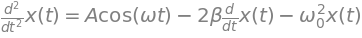

In [268]:
eq3 = sp.Eq(x(t).diff(t,2), -2*beta*x(t).diff(t) -w**2*x(t) + A*sp.cos(ww*t))
eq3

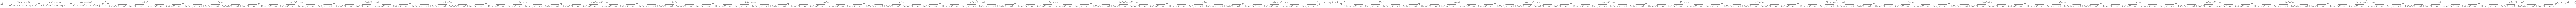

In [269]:
results3 = sp.dsolve(eq3,x(t), ics = {x(0) : x0, x(t).diff(t).subs(t,0) : v0})
results3

Text(0.5, 1.0, 'Damped driven harmonic oscillator ($\\beta = 1, A = 3$)')

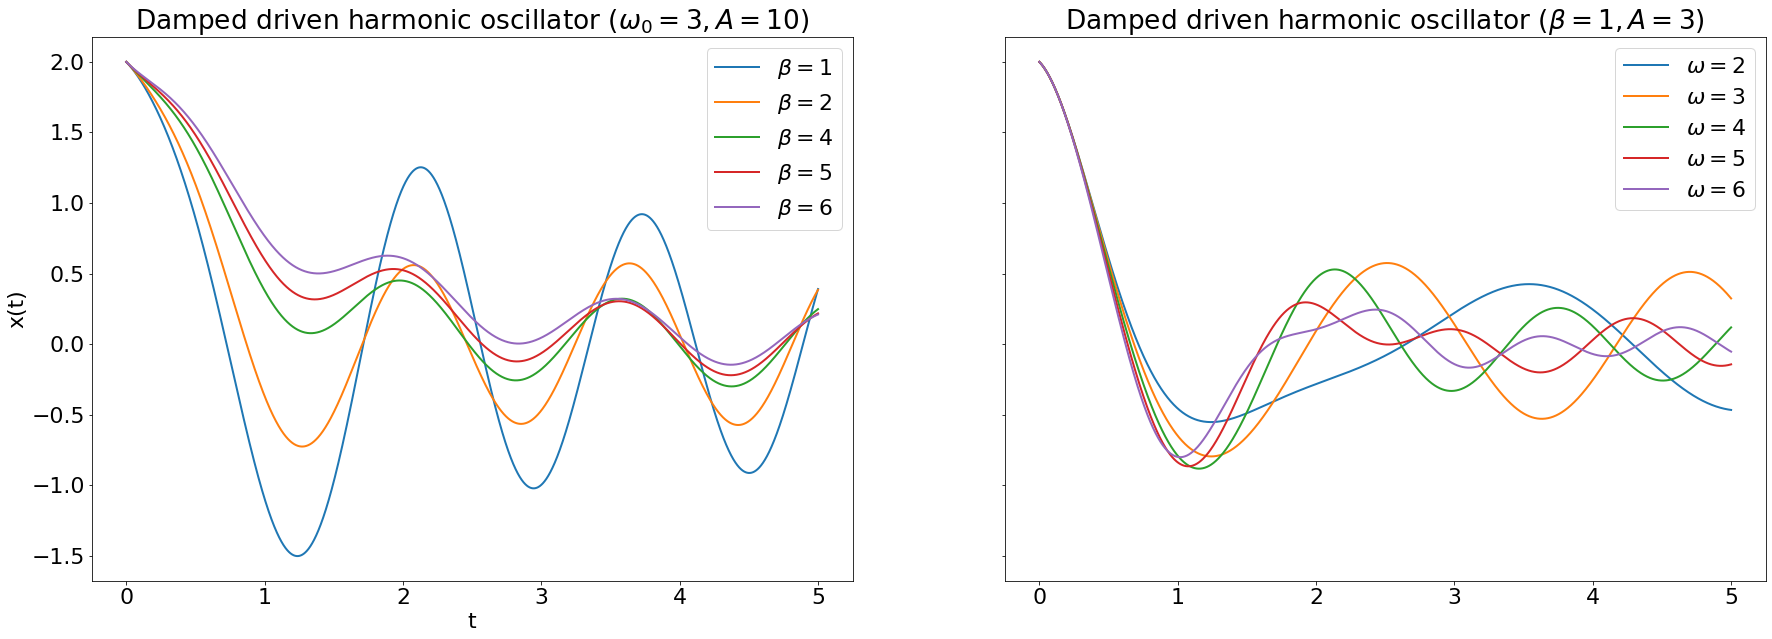

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10),sharex = True, sharey = True)
xx = np.linspace(0,5,10000)
for i,j in zip([1,2,4,5,6],[2,3,4,5,6]):
  ende = sp.lambdify(t,results3.rhs.subs({x0 : 2, v0 : -1, beta : i , w : 3, A : 10, ww : 4}))
  ende2 = sp.lambdify(t,results3.rhs.subs({x0 : 2, v0 : -1, beta : 1 , w : 3, A : 3, ww : j}))
  ax1.plot(xx,ende(xx).real, linewidth = 2, label = r"$\beta = {}$".format(i))
  ax2.plot(xx,ende2(xx).real, linewidth = 2, label = r"$\omega = {}$".format(j))
plt.tick_params(which='both')
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax1.legend()
ax2.legend()
ax1.set_title(r"Damped driven harmonic oscillator ($\omega_0 = {}, A = {}$)".format(3,10))
ax2.set_title(r"Damped driven harmonic oscillator ($\beta = {}, A = {}$)".format(1,3))